In [5]:
#Add All High-Impact Features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure you place your CSV file in the data/raw/ folder)
df = pd.read_csv('../data/featured_data.csv')
print(df.head())


   credit_score  gender  age  tenure    balance  products_number  credit_card  \
0           619       0   42       2       0.00                1            1   
1           608       0   41       1   83807.86                1            0   
2           502       0   42       8  159660.80                3            1   
3           699       0   39       1       0.00                2            0   
4           850       0   43       2  125510.82                1            1   

   active_member  estimated_salary  churn  ...  country_Spain  age_outlier  \
0              1         101348.88      1  ...              0            0   
1              1         112542.58      0  ...              1            0   
2              0         113931.57      1  ...              0            0   
3              0          93826.63      0  ...              0            0   
4              1          79084.10      0  ...              1            0   

   product_heavy_user  low_credit_score  bal

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

#Step 1: Define X (features) and y (target)
# Assume df is your final cleaned DataFrame
X = df.drop('churn', axis=1)
y = df['churn']

#Step 2: Train-Test Split (80% Train, 20% Test)
#stratify=y ensures class balance is maintained in both sets.
#random_state=42 ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Summary
print("✅ Train/Test split complete.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")
print(f"Number of features: {X_train.shape[1]}")

✅ Train/Test split complete.
Training set size: 8000 rows
Testing set size: 2000 rows
Number of features: 20


In [7]:
# ⚖️ Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 🤖 Step 4: Train Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [9]:
# 🎯 Step 5: Make Predictions
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# 📊 Step 6: Evaluate Model Performance
print("📈 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))

print(f"🔵 ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

📈 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1593
           1       0.71      0.31      0.43       407

    accuracy                           0.83      2000
   macro avg       0.78      0.64      0.67      2000
weighted avg       0.82      0.83      0.81      2000

🔵 ROC AUC Score: 0.8102


In [ ]:
#  What’s Working Well:
# The model is great at identifying non-churners (class 0) — 97% recall!

# Overall accuracy is 83%

# ROC AUC of 0.81 is strong — the model is good at ranking customers by churn risk

In [ ]:
# What Needs Work:
# The model only recalls 31% of churners
# → That means it's missing 69% of customers who actually churn 
# F1-score for churn is low (0.43), meaning the model isn’t balancing precision & recall well for class 1

In [ ]:
# Logistic Regression with Class Weighting
logreg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = logreg_balanced.predict(X_test_scaled)
y_proba_balanced = logreg_balanced.predict_proba(X_test_scaled)[:, 1]

print("📈 Classification Report (LogReg with Balanced Class Weights):")
print(classification_report(y_test, y_pred_balanced))
print(f"🔵 ROC AUC Score: {roc_auc_score(y_test, y_proba_balanced):.4f}")


📈 Classification Report (LogReg with Balanced Class Weights):
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.73      0.55       407

    accuracy                           0.75      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.75      0.77      2000

🔵 ROC AUC Score: 0.8127


In [ ]:
#  What Changed (and Why It Matters)
# Recall for churners: 0.31	🔥 Improved to 0.73 ✅
# F1-score for churners: 0.43	🔼 Now 0.55
# Overall Accuracy: 83%	⚖️ Now 75% (expected drop — acceptable trade-off)
# AUC: 0.8102	📈 Now 0.8127


In [11]:
# Get feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_balanced.coef_[0]
})

# Sort by absolute impact
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Show top features
print("🔍 Top Feature Impacts on Churn:")
display(feature_importance[['Feature', 'Coefficient']])

🔍 Top Feature Impacts on Churn:


,Feature,Coefficient
2,age,0.732639
15,is_high_value,0.678155
12,product_heavy_user,0.669337
9,country_Germany,0.380431
11,age_outlier,-0.350328
13,low_credit_score,0.273959
1,gender,-0.271065
17,engagement_score,-0.264447
3,tenure,0.250424
18,loyalty_score,-0.246350


C:\Users\adixb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


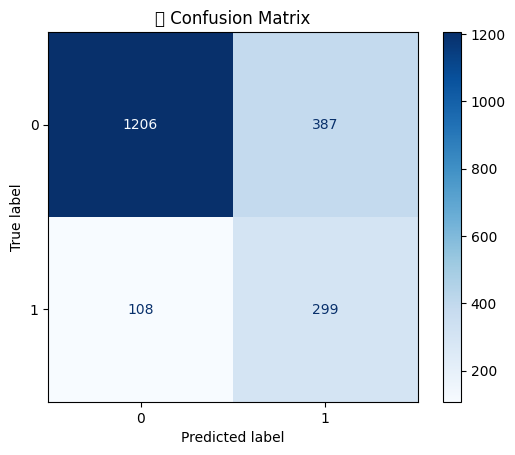

C:\Users\adixb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


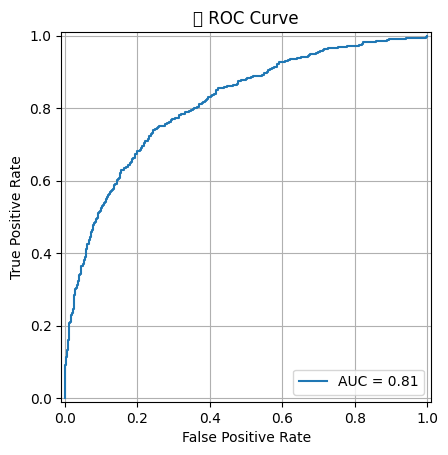

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_balanced.classes_)
disp.plot(cmap='Blues')
plt.title("📊 Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_balanced)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_proba_balanced))
roc_display.plot()
plt.title("🔵 ROC Curve")
plt.grid(True)
plt.show()


0.8127 → strong, effective model at ranking churners